In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Reading the .csv file
df=pd.read_csv('Voting_pattern.csv')
df.head()

,RACE,PARTY
0,WHITE,REPUBLICAN
1,WHITE,REPUBLICAN
2,WHITE,DEMOCRAT
3,HISPANIC,DEMOCRAT
4,ASIAN,DEMOCRAT


In [3]:
#Using info() & describe() methods
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   RACE    1000 non-null   object
 1   PARTY   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [4]:
df.describe()

,RACE,PARTY
count,1000,1000
unique,5,3
top,WHITE,REPUBLICAN
freq,534,404


In [5]:
#Checking for null values
df.isnull().sum()

RACE     0
PARTY    0
dtype: int64

In [6]:
df

,RACE,PARTY
0,WHITE,REPUBLICAN
1,WHITE,REPUBLICAN
2,WHITE,DEMOCRAT
3,HISPANIC,DEMOCRAT
4,ASIAN,DEMOCRAT
...,...,...
995,HISPANIC,REPUBLICAN
996,WHITE,REPUBLICAN
997,WHITE,REPUBLICAN
998,HISPANIC,DEMOCRAT


In [7]:
def PARTY(x):
        if x=='REPUBLICAN':
             return 1
        if x=='DEMOCRAT':
             return 2 
df['PARTY']=df['PARTY'].apply(PARTY)
df

,RACE,PARTY
0,WHITE,1.0
1,WHITE,1.0
2,WHITE,2.0
3,HISPANIC,2.0
4,ASIAN,2.0
...,...,...
995,HISPANIC,1.0
996,WHITE,1.0
997,WHITE,1.0
998,HISPANIC,2.0


In [8]:
def RACE(x):
        if x=='WHITE':
             return 1
        if x=='HISPANIC':
             return 2 
        if x=='ASIAN':
             return 2
df['RACE']=df['RACE'].apply(RACE)
df

,RACE,PARTY
0,1.0,1.0
1,1.0,1.0
2,1.0,2.0
3,2.0,2.0
4,2.0,2.0
...,...,...
995,2.0,1.0
996,1.0,1.0
997,1.0,1.0
998,2.0,2.0


<AxesSubplot:>

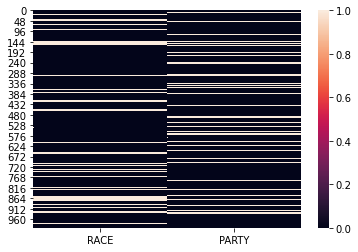

In [9]:
#Checking for null values through heat map
sns.heatmap(df.isnull())

In [10]:
#Filling null values in Age coln
df.groupby('PARTY').mean()

,RACE
PARTY,
1.0,1.307927
2.0,1.374622


In [14]:
df.isnull().sum()

RACE     188
PARTY    193
dtype: int64

In [17]:
df.dropna(axis=0,inplace=True)

In [18]:
df.isnull().sum()

RACE     0
PARTY    0
dtype: int64

In [19]:
#Taking column names
df.columns

Index(['RACE', 'PARTY'], dtype='object')

In [20]:
#Spliting the data
from sklearn.model_selection import train_test_split
X=df[['PARTY']]
y=df['RACE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
#Importing Logistic Regression Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [22]:
#Predicting the ans
y_pred=LR.predict(X_test)

In [23]:
#Finding Accuracy using accuracy_score
accuracy_score(y_test,y_pred)*100

67.17171717171718

In [24]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[133,   0],
       [ 65,   0]], dtype=int64)

In [25]:
#Finding Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.67      1.00      0.80       133
         2.0       0.00      0.00      0.00        65

    accuracy                           0.67       198
   macro avg       0.34      0.50      0.40       198
weighted avg       0.45      0.67      0.54       198



C:\Users\ANIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ANIL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
